## Import

In [1]:
import pandas as pd
import numpy as np
import pickle

# model
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# visualize
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# ignore warnings
import warnings ; warnings.filterwarnings('ignore')

## Read data

In [2]:
symphony_feature, chorus_feature, voice_feature, solo_feature = pickle.load(open(f'../data/Feature/Feature_230925.pkl','rb'))

## Feature Transformation

In [3]:
def Transformation(FEATURES, TARGET):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(FEATURES, TARGET, test_size=0.2, random_state=2023)
    # Scaling
    num = ['meansale','cluster_tran_gap','cluster_price_rate','play_time', 'pre_open_gap', 'n_grade','running_time', 'intermission',
           'n_grade', 'n_performance_month', 'sales', 'G1', 'G2', 'G3', 'G4', 'G5', 'price_rate', 
           '100_tran_gap', 'play_gap']
    scaler = StandardScaler()
    X_train[num] = scaler.fit_transform(X_train[num])
    X_test[num] = scaler.transform(X_test[num])
    return X_train, X_test, y_train, y_test 

## Modeling

- 교향곡

In [4]:
X_train, X_test, y_train, y_test = Transformation(symphony_feature.drop('TARGET', axis=1), symphony_feature['TARGET'])
model = PLSRegression(n_components=5)
model.fit(X_train, y_train)

PLSRegression(n_components=5)

In [5]:
# test데이터의 71%를 설명한다.
model.score(X_train, y_train)

0.5406360852031588

In [6]:
# RMSE: 55149.876577811025
print(f'RMSE: {np.sqrt(mean_squared_error(model.predict(X_test), y_test))}')

RMSE: 0.25335954832843366


In [7]:
fimportance = pd.Series(model.coef_.flatten(), index=X_train.columns, name='FImportance')
fimportance.abs().sort_values().head()

play_gap            0.000538
G5                  0.001128
open_month          0.001539
vector_1            0.001594
cluster_tran_gap    0.001761
Name: FImportance, dtype: float64

<AxesSubplot:>

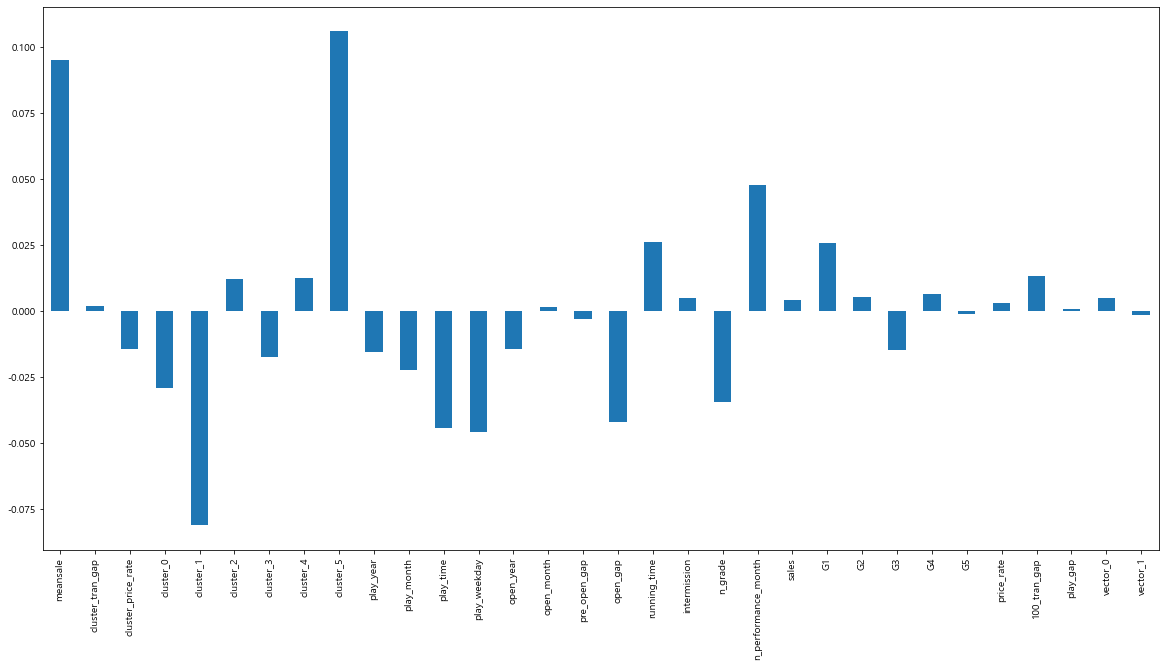

In [8]:
fimportance.plot.bar(figsize=(20,10))

- 합창

In [9]:
X_train, X_test, y_train, y_test = Transformation(chorus_feature.drop('TARGET', axis=1), chorus_feature['TARGET'])
model = PLSRegression(n_components=5)
model.fit(X_train, y_train)

PLSRegression(n_components=5)

In [10]:
# test데이터의 71%를 설명한다.
model.score(X_train, y_train)

0.3149161615269708

In [11]:
# RMSE: 55149.876577811025
print(f'RMSE: {np.sqrt(mean_squared_error(model.predict(X_test), y_test))}')

RMSE: 0.2391297062449026


In [12]:
fimportance = pd.Series(model.coef_.flatten(), index=X_train.columns, name='FImportance')
fimportance.abs().sort_values().head()

vector_0            0.000772
vector_1            0.001241
intermission        0.001895
cluster_tran_gap    0.002043
G5                  0.002598
Name: FImportance, dtype: float64

<AxesSubplot:>

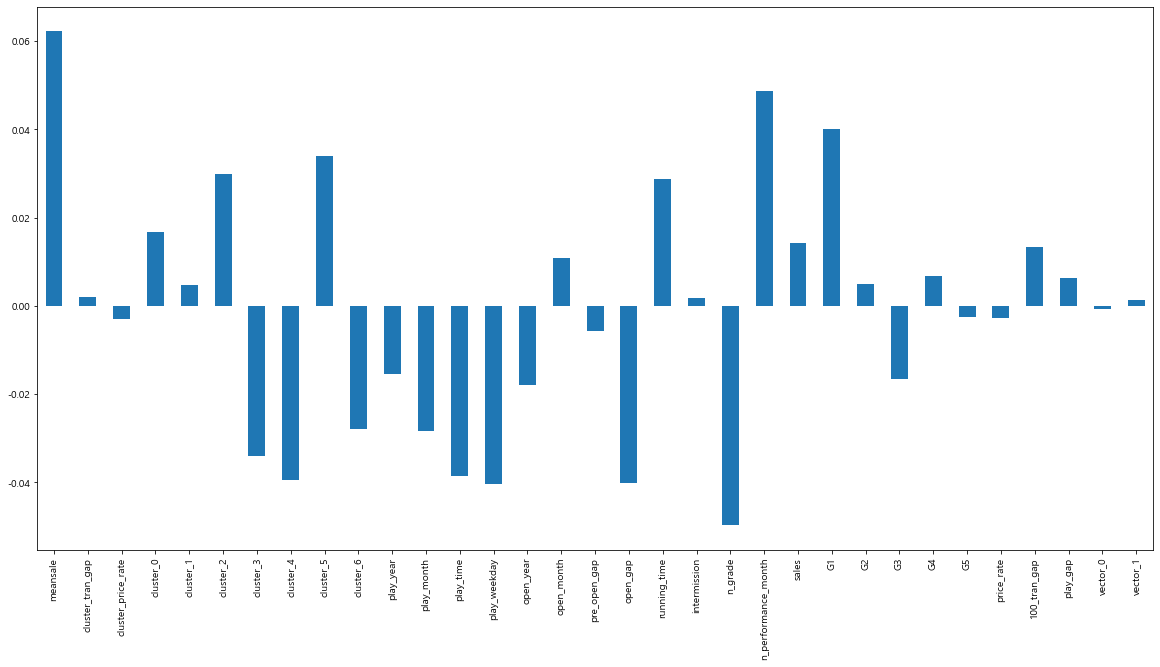

In [13]:
fimportance.plot.bar(figsize=(20,10))

- 성악

In [14]:
X_train, X_test, y_train, y_test = Transformation(voice_feature.drop('TARGET', axis=1), voice_feature['TARGET'])
model = PLSRegression(n_components=5)
model.fit(X_train, y_train)

PLSRegression(n_components=5)

In [15]:
# test데이터의 71%를 설명한다.
model.score(X_train, y_train)

0.3309214519499213

In [16]:
# RMSE: 55149.876577811025
print(f"RMSE: {np.sqrt(mean_squared_error(model.predict(X_test), y_test))}")

RMSE: 0.254166600828518


In [17]:
fimportance = pd.Series(model.coef_.flatten(), index=X_train.columns, name='FImportance')
fimportance.abs().sort_values().head()

vector_1        0.000064
vector_0        0.000373
intermission    0.000492
price_rate      0.001678
pre_open_gap    0.003110
Name: FImportance, dtype: float64

<AxesSubplot:>

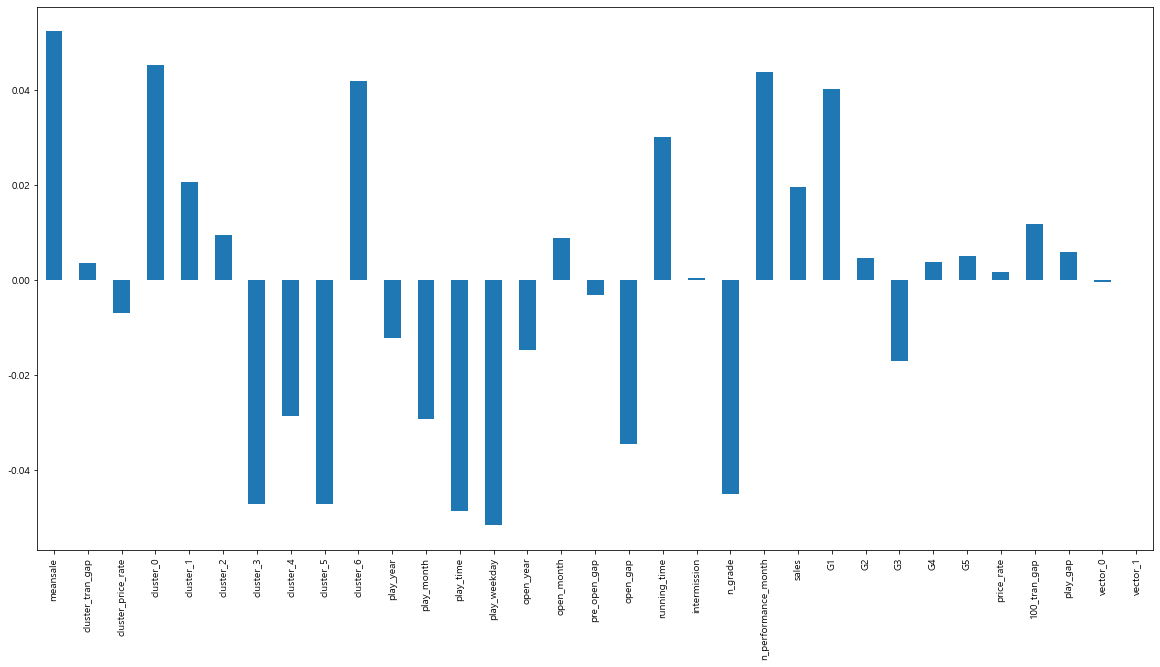

In [18]:
fimportance.plot.bar(figsize=(20,10))

- 독주

In [19]:
X_train, X_test, y_train, y_test = Transformation(solo_feature.drop('TARGET', axis=1), solo_feature['TARGET'])
model = PLSRegression(n_components=5)
model.fit(X_train, y_train)

PLSRegression(n_components=5)

In [20]:
# test데이터의 71%를 설명한다.
model.score(X_train, y_train)

0.2778420231906502

In [21]:
# RMSE: 55149.876577811025
print(f'RMSE: {np.sqrt(mean_squared_error(model.predict(X_test), y_test))}')

RMSE: 0.2209588071026607


In [22]:
fimportance = pd.Series(model.coef_.flatten(), index=X_train.columns, name='FImportance')
fimportance.abs().sort_values().head()

cluster_price_rate    0.000075
intermission          0.000650
cluster_3             0.000966
G5                    0.001177
vector_0              0.001615
Name: FImportance, dtype: float64

<AxesSubplot:>

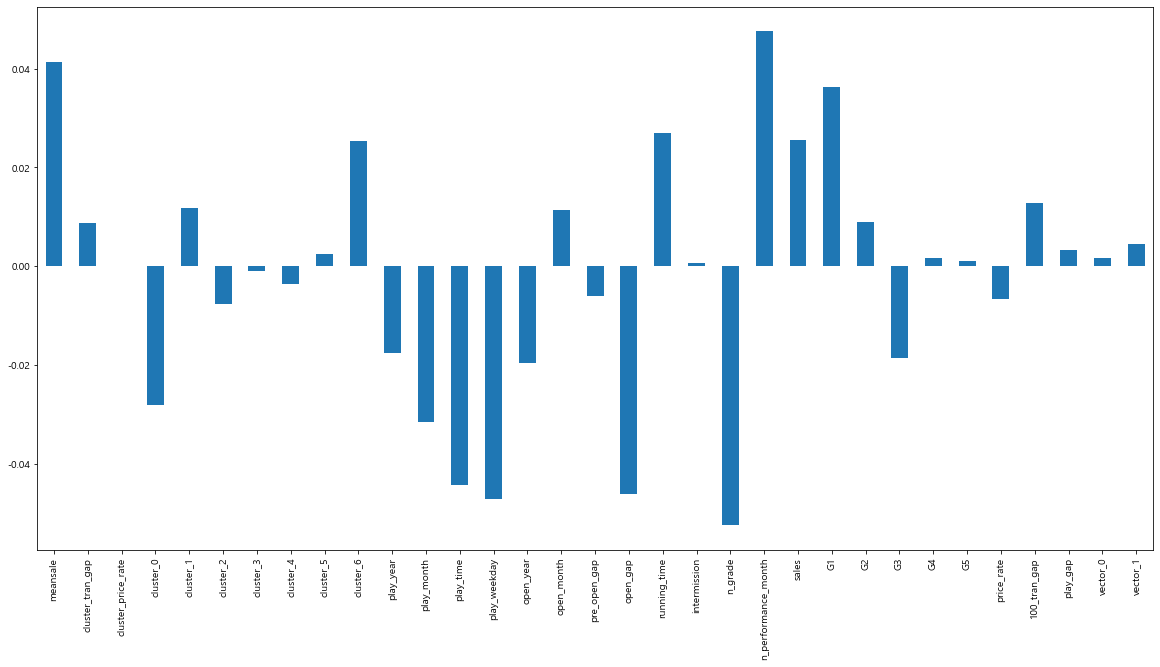

In [23]:
fimportance.plot.bar(figsize=(20,10))

## Save Data